Exercise 1

1. Load the CIFAR-10 dataset

2. Implement a CNN model (e.g. 5 conv layers) with <=100 features on output

3. Train the discriminator using triplet loss

4. Save the weights of trained discriminator model

5. Build a model for classification of CIFAR-10, starting with the layers from discriminator and one or two fully-connected layers after that

6. Train this model in the following scenarios and compare results:

a. Randomly initialized model

b. Model with weights for convolutional layers loaded from trained discriminator, fully-connected layers initialized randomly

c. Model with weights for convolutional layers loaded from trained discriminator and freezed, fully-connected layers initialized randomly

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [2]:
train_dataset , test_dataset = cifar10.load_data()

In [3]:
x_train.shape

(50000, 32, 32, 3)

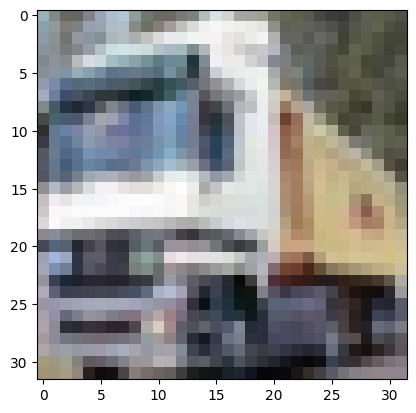

In [4]:
plt.imshow(x_train[1])

C:\Users\akopa\AppData\Local\Temp\ipykernel_20980\1710894633.py:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label_index = int(y_train[index])


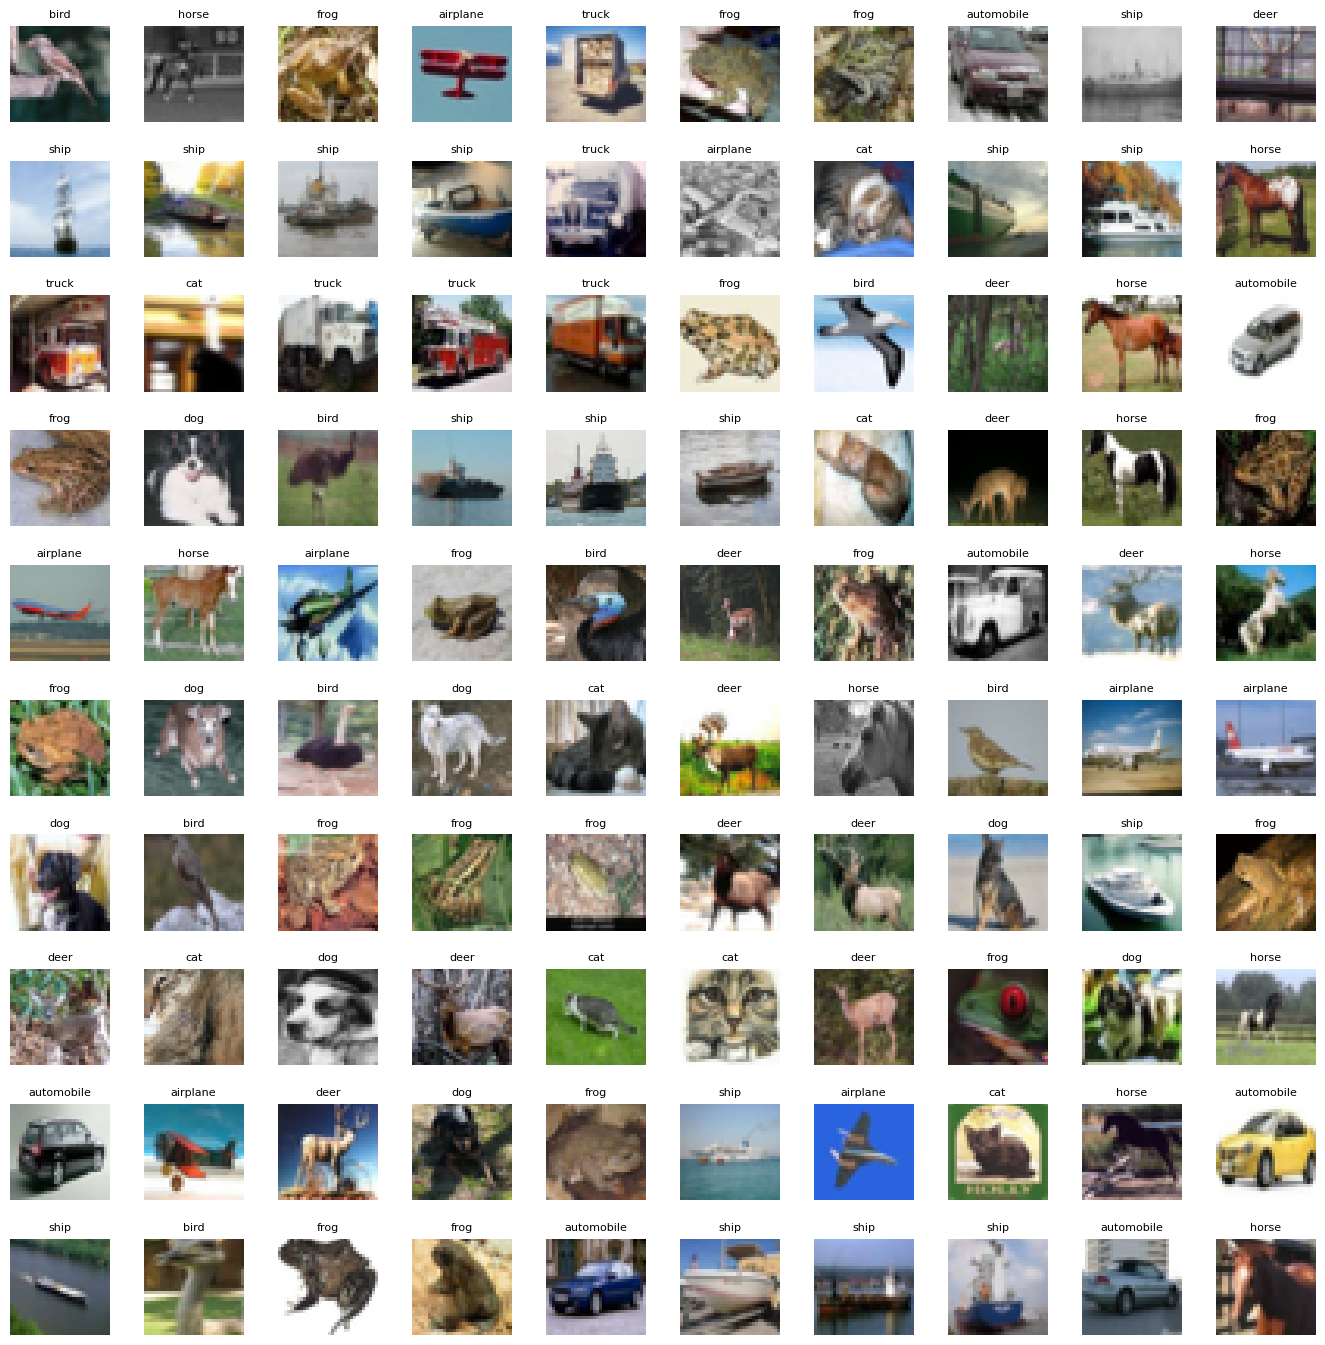

In [5]:
# Define the labels of the dataset
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
          'dog', 'frog', 'horse', 'ship', 'truck']

# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 10
L_grid = 10

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_train = len(x_train) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index    
    axes[i].imshow(x_train[index,1:])
    label_index = int(y_train[index])
    axes[i].set_title(labels[label_index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

In [6]:
x_train.shape

(50000, 32, 32, 3)

some preprocessing

In [7]:
y_train, y_test = y_train.flatten(), y_test.flatten()
x_train = x_train/255.0
x_test = x_test/255.0

In [8]:
# define discriminator 

model = keras.Sequential()
model.add(keras.Input((32,32,3)))
model.add(keras.layers.Conv2D(32,(3,3),padding = 'same',activation = 'relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(64,(3,3),padding = 'same',activation = 'relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(256,(3,3),padding = 'same',activation = 'relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(64,(3,3),padding = 'same',activation = 'relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(32,(3,3),padding = 'same',activation = 'relu'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128))  # Output embeddings
model.add(keras.layers.UnitNormalization())  # normalize according to l2 norm 

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 256)      │       147,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 4, 4, 64)       │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 2, 2, 32)       │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ unit_normalization              │ (None, 128)            │             0 │
│ (UnitNormalization)             │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 349,600 (1.33 MB)

 Trainable params: 349,600 (1.33 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# from triplet import TripletSemiHardLoss
from tensor_addons_triplet_loss import TripletSemiHardLoss

In [11]:
model.compile(optimizer='adam',
              loss=TripletSemiHardLoss())

history = model.fit(x_train, y_train, epochs=100, 
                    validation_data=(x_test, y_test))

Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.9625 - val_loss: 0.9195
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.9207 - val_loss: 0.8996
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.8997 - val_loss: 0.8888
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.8808 - val_loss: 0.8707
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.8572 - val_loss: 0.8236
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.8157 - val_loss: 0.8052
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.7821 - val_loss: 0.7747
Epoch 8/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.7493 - val_loss: 0.7407
Epoch 9/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.7257 - val_loss: 0.7393
Epoch 10/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.7111 - val_loss: 0.7363
Epoch 11/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.6901 - val_loss: 0.7066
Epoch 12/100
1563/1

In [12]:
model.save_weights("discriminator.weights.h5")

In [13]:
model.layers

[<Conv2D name=conv2d, built=True>,
 <MaxPooling2D name=max_pooling2d, built=True>,
 <Conv2D name=conv2d_1, built=True>,
 <MaxPooling2D name=max_pooling2d_1, built=True>,
 <Conv2D name=conv2d_2, built=True>,
 <MaxPooling2D name=max_pooling2d_2, built=True>,
 <Conv2D name=conv2d_3, built=True>,
 <MaxPooling2D name=max_pooling2d_3, built=True>,
 <Conv2D name=conv2d_4, built=True>,
 <Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <UnitNormalization name=unit_normalization, built=True>]

In [14]:
# Load weights into an existing model
model.load_weights('discriminator.weights.h5')

In [62]:
def create_model():
    # same is discriminator
    model_random = keras.Sequential()
    model_random.add(keras.Input((32,32,3)))
    model_random.add(keras.layers.Conv2D(32,(3,3),padding = 'same',activation = 'relu'))
    model_random.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
    model_random.add(keras.layers.Conv2D(64,(3,3),padding = 'same',activation = 'relu'))
    model_random.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
    model_random.add(keras.layers.Conv2D(256,(3,3),padding = 'same',activation = 'relu'))
    model_random.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
    model_random.add(keras.layers.Conv2D(64,(3,3),padding = 'same',activation = 'relu'))
    model_random.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
    model_random.add(keras.layers.Conv2D(32,(3,3),padding = 'same',activation = 'relu'))
    model_random.add(keras.layers.Flatten())
    model_random.add(keras.layers.Dense(128))  # Output embeddings
    model_random.add(keras.layers.UnitNormalization())  # normalize according to l2 norm 
    # fully connected layers
    
    model_random.add(keras.layers.Dense(128,activation='relu'))
    model_random.add(keras.layers.Dense(10,activation='softmax'))
    
        
    return model_random


In [63]:
model_random = create_model()


In [64]:
model_random.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_60 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_48 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_61 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_49 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_62 (Conv2D)              │ (None, 8, 8, 256)      │       147,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_50 (MaxPooling2D) │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_63 (Conv2D)              │ (None, 4, 4, 64)       │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_51 (MaxPooling2D) │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_64 (Conv2D)              │ (None, 2, 2, 32)       │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ unit_normalization_5            │ (None, 128)            │             0 │
│ (UnitNormalization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 367,402 (1.40 MB)

 Trainable params: 367,402 (1.40 MB)

 Non-trainable params: 0 (0.00 B)

In [65]:
def accuracy_fn(y_pred , y):
    y_pred = np.array(y_pred)
    y = np.array(y)
    counter = 0
    for i in range(len(y)):
        if y[i] != y_pred[i]:
            counter +=1
    return 1 - counter / len(y)

In [66]:
train_labels_oh , test_labels_oh = keras.utils.to_categorical(y_train, num_classes=10),keras.utils.to_categorical(y_test,num_classes = 10) # 1 hot encoding 

In [67]:
model_random.compile(optimizer='adam',
              loss='CategoricalCrossentropy',
              metrics = ['accuracy'])

history1 = model_random.fit(x_train, train_labels_oh, epochs=10, 
                    validation_data=(x_test, test_labels_oh))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.3370 - loss: 1.7870 - val_accuracy: 0.5727 - val_loss: 1.1849
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5849 - loss: 1.1370 - val_accuracy: 0.6475 - val_loss: 0.9809
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6836 - loss: 0.9030 - val_accuracy: 0.6972 - val_loss: 0.8701
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7329 - loss: 0.7545 - val_accuracy: 0.7172 - val_loss: 0.8238
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7763 - loss: 0.6398 - val_accuracy: 0.7128 - val_loss: 0.8499
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8074 - loss: 0.5452 - val_accuracy: 0.7139 - val_loss: 0.8528
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8359 - loss: 0.4807 - val_accuracy: 0.7339 - val_loss: 0.8156
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8557 - loss: 0.4186 - 

In [68]:
y_pred = np.argmax(model_random(x_test),axis = 1)
accuracy_fn(y_pred,y_test)

0.7319

In [77]:
model_from_dis = create_model()

In [78]:
model_from_dis.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_75 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_60 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_76 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_61 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_77 (Conv2D)              │ (None, 8, 8, 256)      │       147,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_62 (MaxPooling2D) │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_78 (Conv2D)              │ (None, 4, 4, 64)       │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_63 (MaxPooling2D) │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_79 (Conv2D)              │ (None, 2, 2, 32)       │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_15 (Flatten)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ unit_normalization_8            │ (None, 128)            │             0 │
│ (UnitNormalization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 367,402 (1.40 MB)

 Trainable params: 367,402 (1.40 MB)

 Non-trainable params: 0 (0.00 B)

In [79]:
model_from_dis.load_weights("discriminator.weights.h5",skip_mismatch = True)

c:\Users\akopa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:629: UserWarning: A total of 2 objects could not be loaded. Example error message for object <Dense name=dense_42, built=True>:

Layer 'dense_42' expected 2 variables, but received 0 variables during loading. Expected: ['kernel', 'bias']

List of objects that could not be loaded:
[<Dense name=dense_42, built=True>, <Dense name=dense_43, built=True>]
  warnings.warn(msg)


In [80]:
model_from_dis.compile(optimizer='adam',
              loss='CategoricalCrossentropy',
              metrics = ['accuracy'])

history2 = model_from_dis.fit(x_train, train_labels_oh, epochs=10, 
                    validation_data=(x_test, test_labels_oh))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9039 - loss: 0.5562 - val_accuracy: 0.7329 - val_loss: 1.1121
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9498 - loss: 0.2326 - val_accuracy: 0.7539 - val_loss: 0.9939
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9538 - loss: 0.2059 - val_accuracy: 0.7472 - val_loss: 0.9993
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9566 - loss: 0.1938 - val_accuracy: 0.7520 - val_loss: 1.0214
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9570 - loss: 0.1859 - val_accuracy: 0.7496 - val_loss: 1.0405
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9621 - loss: 0.1661 - val_accuracy: 0.7475 - val_loss: 1.0230
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9624 - loss: 0.1587 - val_accuracy: 0.7473 - val_loss: 1.0775
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9639 - loss: 0.1520 - 

In [81]:
model_from_dis_frozen = create_model()

In [82]:
model_from_dis_frozen.load_weights("discriminator.weights.h5",skip_mismatch = True)

c:\Users\akopa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:629: UserWarning: A total of 2 objects could not be loaded. Example error message for object <Dense name=dense_45, built=True>:

Layer 'dense_45' expected 2 variables, but received 0 variables during loading. Expected: ['kernel', 'bias']

List of objects that could not be loaded:
[<Dense name=dense_45, built=True>, <Dense name=dense_46, built=True>]
  warnings.warn(msg)


In [83]:
for layer in model_from_dis_frozen.layers[:-2]:   # layers that was included in discrimator 
    layer.trainable = False

In [84]:
model_from_dis_frozen.layers[0].trainable

False

In [85]:
model_from_dis_frozen.compile(optimizer='adam',
              loss='CategoricalCrossentropy',
              metrics = ['accuracy'])

history3 = model_from_dis_frozen.fit(x_train, train_labels_oh, epochs=10, 
                    validation_data=(x_test, test_labels_oh))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8911 - loss: 0.6115 - val_accuracy: 0.7275 - val_loss: 1.1246
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9157 - loss: 0.3516 - val_accuracy: 0.7282 - val_loss: 1.1269
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9205 - loss: 0.3304 - val_accuracy: 0.7262 - val_loss: 1.1097
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9212 - loss: 0.3274 - val_accuracy: 0.7285 - val_loss: 1.0990
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9189 - loss: 0.3345 - val_accuracy: 0.7292 - val_loss: 1.0912
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9175 - loss: 0.3411 - val_accuracy: 0.7277 - val_loss: 1.1149
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9199 - loss: 0.3280 - val_accuracy: 0.7285 - val_loss: 1.0828
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9208 - loss: 0.3216 - 